# (실습) 통계 기초

**참고**

[통계 기초](https://codingalzi.github.io/datapy/from_scratch_2.html)에
정의된 다음 함수들을 활용할 수 있다.

- mean
- median
- quantile
- mode
- data_range
- iqr
- var
- std
- cov
- corrcoef

**필수 모듈**

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [1]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

In [2]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = mpl.font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font)
# 우분투/구글 코랩 설정
elif platform.system() == 'Linux':
    # 우분투/구글코랩의 경우 아래 명령문이 최소 한번 실행되어야 함
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    font = "NanumBarunGothic"
    if not any(map(lambda ft: ft.name == font, mpl.font_manager.fontManager.ttflist)):
        mpl.font_manager.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=font)
    plt.rc("axes", unicode_minus=False)

## 데이터 준비

영산강에 설치된 승천보에서 측정한 두 개의 데이터셋이다.

- `chl_a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `flow`: 보에서 방출되는 시간당 방류량 수치 100개

두 데이터셋의 인덱스는 수질(water quality)을 가리키며,
높은 숫자일 수록 수질은 나쁘다.

In [3]:
# 클로로필-A 수치 100개

chl_a = [51, 51, 53, 53, 54, 55, 57, 57, 59, 60,
         61, 62, 63, 64, 65, 66, 67, 67, 67, 69,
         70, 71, 71, 72, 73, 75, 75, 76, 77, 79,
         81, 81, 83, 83, 85, 86, 87, 88, 88, 88,
         89, 89, 90, 91, 92, 95, 96, 96, 97, 98,
         98, 98, 99, 101, 101, 102, 102, 103, 104, 104,
         104, 104, 105, 106, 107, 108, 110, 111, 111, 112,
         112, 112, 113, 114, 114, 116, 116, 116, 117, 118,
         118, 118, 118, 119, 120, 120, 121, 122, 125, 120,
         121, 121, 121, 122, 122, 122, 122, 124, 125, 124]

In [4]:
# 시간당 방류량 수치 100개

flow = [25, 25, 24, 24, 22, 22, 21, 21, 20, 20,
        19, 19, 19, 18, 18, 18, 17, 17, 17, 16,
        16, 16, 17, 16, 17, 17, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 15, 15, 15, 15, 15,
        15, 14, 15, 14, 14, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 12, 12, 12, 12,
        12, 12, 52, 11, 11, 11, 11, 11, 12, 12,
        12, 12, 12, 11, 12, 12, 12, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 10,
        9, 9, 9, 9, 9, 9, 9, 49, 9, 9]

**문제**

각각의 데이터셋 크기가 100임을 확인하라.

힌트: `len()` 함수

In [14]:
print(len(chl_a))

print(len(flow))

100
100


**문제**

가장 높은 클로로필-A의 수치는 얼마인가?

In [15]:
max(chl_a)

125

**문제**

가장 낮은 시간당 방류량 수치는 얼마인가?

In [16]:
min(flow)

9

## 데이터 살펴보기

**문제**

클로로필-A 데이터에 포함된 값들의 빈도를 막대그래프로 그려라.

힌트: `from collections import Counter`

In [20]:
from collections import Counter

chl_a_counts = Counter(chl_a)
print(chl_a_counts)

Counter({122: 5, 104: 4, 118: 4, 121: 4, 67: 3, 88: 3, 98: 3, 112: 3, 116: 3, 120: 3, 51: 2, 53: 2, 57: 2, 71: 2, 75: 2, 81: 2, 83: 2, 89: 2, 96: 2, 101: 2, 102: 2, 111: 2, 114: 2, 125: 2, 124: 2, 54: 1, 55: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 69: 1, 70: 1, 72: 1, 73: 1, 76: 1, 77: 1, 79: 1, 85: 1, 86: 1, 87: 1, 90: 1, 91: 1, 92: 1, 95: 1, 97: 1, 99: 1, 103: 1, 105: 1, 106: 1, 107: 1, 108: 1, 110: 1, 113: 1, 117: 1, 119: 1})


## 중심 경향성과 평균

**문제**

방류량의 평균값을 계산하라.

In [23]:
import numpy as np
np.mean(flow)

14.93

**문제**

방류량의 중앙값을 계산하라.

In [24]:
np.median(flow)

13.0

**문제**

방류량의 최빈값을 계산하라.

In [31]:
# 최빈값: 가장 많이 관측되는 수, 즉 주어진 값 중에서 가장 자주 나오는 값이다.
from scipy.stats import mode
modeResult = mode(flow)
print(f'최빈값: {modeResult.mode} / 해당 count: {modeResult.count}')

최빈값: 11 / 해당 count: 18


**문제**

방류량의 제1, 제3 사분위수를 계산하라.

## 산포도와 분산

**문제**

클로로필-A 데이터의 범위를 계산하라.

In [32]:
def data_range(xs):
  return max(xs) - min(xs)

data_range(chl_a)

74

**문제**

클로로필-A 데이터의 분산을 계산하라.

**문제**

클로로필-A 데이터의 표준편차를 계산하라.

## 선형 상관관계

**문제**

클로로필-A와 시간당 방류량 사이의 공분산을 계산하고
두 데이터 사이의 상관관계를 설명하라.

**문제**

클로로필-A와 시간당 방류량 사이의 피어슨 상관계수를 계산하고
두 데이터 사이의 선형 상관관계를 설명하라.

## 이상치

**산점도**

x축을 방류량, y축을 클로로필-A 수치로 지정한 다음 산점도를 그려보자.

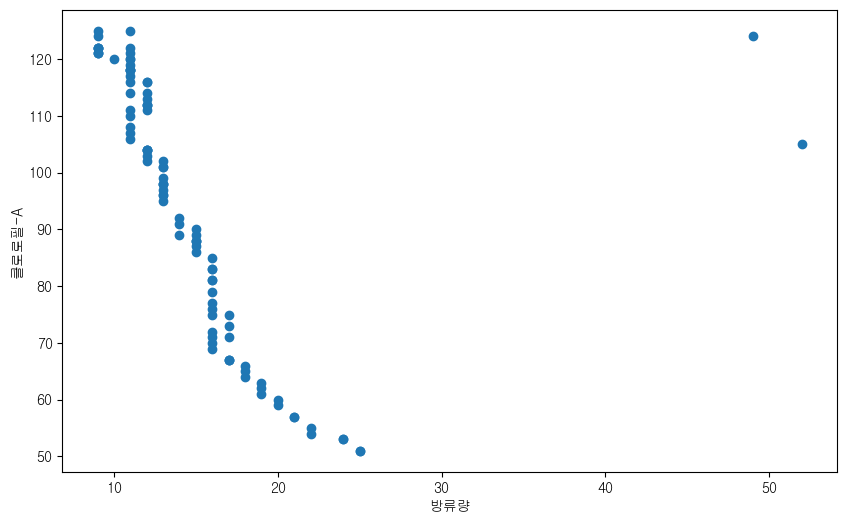

In [5]:
plt.scatter(flow, chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

위 산점도에 따르면 두 개의 이상치가 존재한다.
어떤 데이터가 이상치인지 설명하라.

**문제**

클로로필-A 데이터와 방수량 두 데이터셋 모두에서
이상치에 해당하는 두 개의 값을 제거한다.

In [6]:
# None을 적절한 표현식으로 대체할 것.

new_chl_a = None

In [7]:
# None을 적절한 표현식으로 대체할 것.

new_flow = None

이상치를 제거한 두 데이터셋을 이용하여 산점도를 다시 그려라.

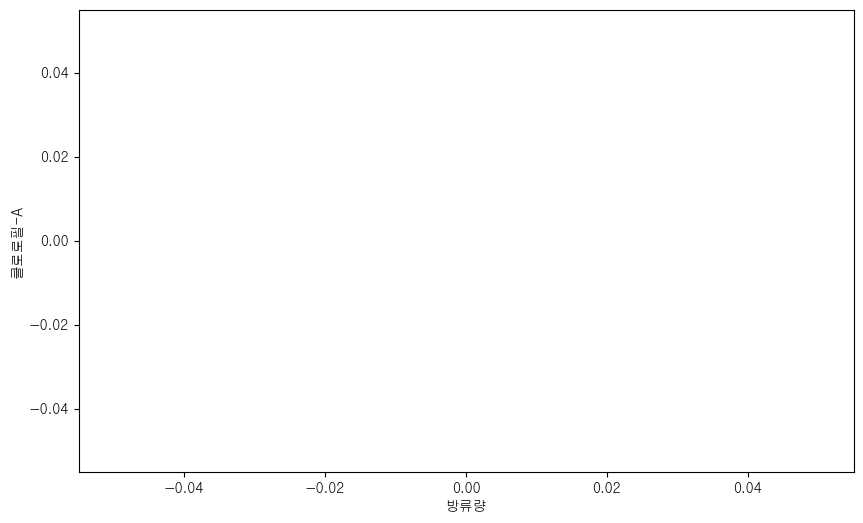

In [8]:
plt.scatter(new_flow, new_chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

이상치를 제거하기 이전과 이후의 데이터셋을 이용하여 아래 값들이 어떻게 달라졌는지 설명하라.

- 평균값, 중앙값, 최빈값
- 범위, 사분범위, 분산, 표준편차
- 공분산, 피어슨 상관계수